<a href="https://colab.research.google.com/github/motazsaad/ai-csci4304/blob/master/Fuzzy_logic_scikit_fuzzy_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install scikit-fuzzy python package 

In [1]:
! pip install -U scikit-fuzzy

Requirement already up-to-date: scikit-fuzzy in /usr/local/lib/python3.6/dist-packages (0.4.2)


# Define universe variables and fuzzy membership functions

In [0]:
import numpy as np
import skfuzzy as fuzz

# Generate universe variable
x = np.arange(11)

# Generate fuzzy membership function
mfx = fuzz.trimf(x, [0, 5, 10])

In [3]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [4]:
mfx

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 0.8, 0.6, 0.4, 0.2, 0. ])

# Visualize this universe and membership function


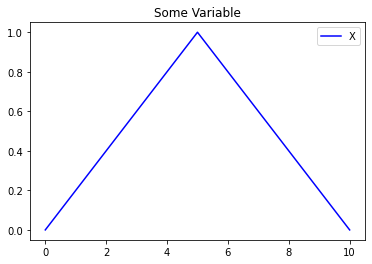

In [5]:
import matplotlib.pyplot as plt

fig, (ax0) = plt.subplots()
ax0.plot(x, mfx, 'b', linewidth=1.5, label='X')
ax0.set_title('Some Variable')
ax0.legend()

# The easy way

# Example 

Taking the tipping example full circle, if we were to create a controller which estimates the tip we should give at a restaurant, we might structure it as such:
Taking the tipping example full circle, if we were to create a controller which estimates the tip we should give at a restaurant, we might structure it as such:

* Antecednets (Inputs)
  * service
    * Universe (ie, crisp value range): How good was the service of the waitress, on a scale of 1 to 10?
    * Fuzzy set (ie, fuzzy value range): poor, acceptable, amazing

  * food quality
    * Universe: How tasty was the food, on a scale of 1 to 10?
    * Fuzzy set: bad, decent, great

* Consequents (Outputs)
  * tip
    * Universe: How much should we tip, on a scale of 0% to 25%
    * Fuzzy set: low, medium, high

* Rules
  * IF the service was good or the food quality was good, THEN the tip will be high.
  * IF the service was average, THEN the tip will be medium.
  * IF the service was poor and the food quality was poor THEN the tip will be low.

* Usage
  * If I tell this controller that I rated:
    * the service as 9.8, and
    * the quality as 6.5,
  * What it would recommend I leave:



In [0]:
# imports 
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions


In [0]:
# New Antecedent/Consequent objects hold universe variables and membership
# functions
quality = ctrl.Antecedent(universe=np.arange(0, 11, 1), label='quality')
service = ctrl.Antecedent(universe=np.arange(0, 11, 1), label='service')
tip = ctrl.Consequent(universe=np.arange(0, 26, 1), label='tip', defuzzify_method='centroid') 
# other methods 'centroid', 'bisector', 'mean of maximum', 'min of maximum','max of maximum'
# centroid, bisector, mom, som, lom 
# https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_defuzzify.html

# Auto-membership function population is possible with .automf(3, 5, or 7)
# for inputs 

In [0]:
# Auto-membership function population is possible with .automf(3, 5, or 7)
quality.automf(3)
service.automf(3)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
# for output 

In [0]:
# Custom membership functions can be built interactively with a familiar,
# Pythonic API
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

# Visulize membership function 

## Quality (input)

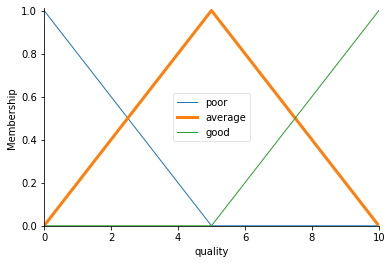

In [10]:
# You can see how these look with .view()

quality['average'].view()

## Service (input)

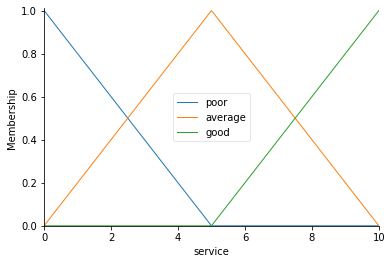

In [11]:
service.view()

# Tip (output)

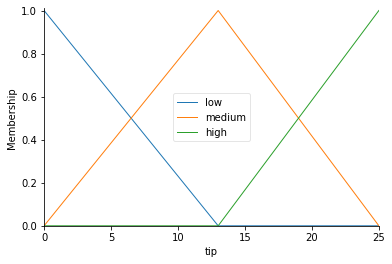

In [12]:
tip.view()

# Fuzzy rules

Now, to make these triangles useful, we define the fuzzy relationship between input and output variables. For the purposes of our example, consider three simple rules:

1. If the food is poor OR the service is poor, then the tip will be low
2. If the service is average, then the tip will be medium
3. If the food is good OR the service is good, then the tip will be high.

In [0]:
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])

# Control System Creation and Simulation


In [0]:
tipping_ctrl = ctrl.ControlSystem(rules=[rule1, rule2, rule3])
tipping = ctrl.ControlSystemSimulation(control_system=tipping_ctrl, clip_to_bounds=True)

# simulate / Compute 

19.847607361963192


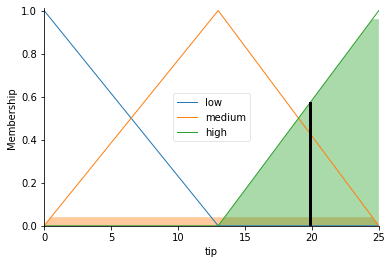

In [15]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['quality'] = 6.5
tipping.input['service'] = 9.8

# Crunch the numbers
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)

21.0


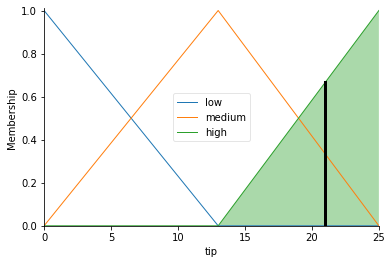

In [16]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['quality'] = 10
tipping.input['service'] = 10

# Crunch the numbers
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)

13.231189098660167


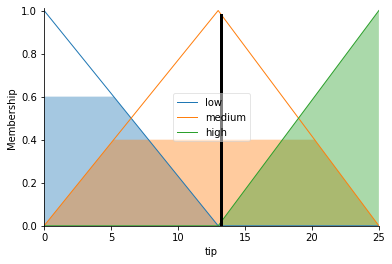

In [17]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['quality'] = 10
tipping.input['service'] = 2

# Crunch the numbers
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)

11.438735428856528


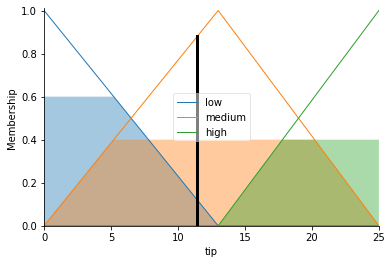

In [18]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['quality'] = 7
tipping.input['service'] = 2

# Crunch the numbers
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)